## Neural Network Model Analysis on House Prices

### Load the Preprocessed Data

In [34]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed training and testing data
X_train = pd.read_csv("./data/X_train.csv")
y_train = pd.read_csv("./data/y_train.csv").squeeze()
X_test = pd.read_csv("./data/X_test.csv")
y_test = pd.read_csv("./data/y_test.csv").squeeze()
        

### Initialize and Train the Neural Network Model

In [35]:

# Initialize the Neural Network Model with more iterations and a dynamic learning rate
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                        alpha=0.0001, batch_size='auto', learning_rate='adaptive', 
                        learning_rate_init=0.001, max_iter=100000, random_state=42, validation_fraction=0.1)

# Train the model with the training data
nn_model.fit(X_train, y_train)
        

MLPRegressor(learning_rate='adaptive', max_iter=100000, random_state=42)

### Predict and Evaluate the Model

In [2]:
# Predict the Test set results
y_pred_nn = nn_model.predict(X_test)

# Evaluate the Neural Network Model Performance
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)  # Calculate RMSE
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
medae_nn = median_absolute_error(y_test, y_pred_nn)

# Output model performance
print('Neural Network Model Performance:')
print('Mean Squared Error:', mse_nn)
print('Root Mean Squared Error:', rmse_nn) 
print('R-squared Score:', r2_nn)
print('Mean Absolute Error:', mae_nn)
print('Median Absolute Error:', medae_nn) 

Neural Network Model Performance:
Mean Squared Error: 2682872460.491231
Root Mean Squared Error: 51796.45219984889
R-squared Score: 0.597173742533552
Mean Absolute Error: 28745.311620900484
Median Absolute Error: 17339.725688138322


/Users/yitengjiang6666/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


### Model Settings

In [37]:
print('Neural Network Model Settings:')
print(nn_model.get_params())

Neural Network Model Settings:
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


### Visualization of Predictions

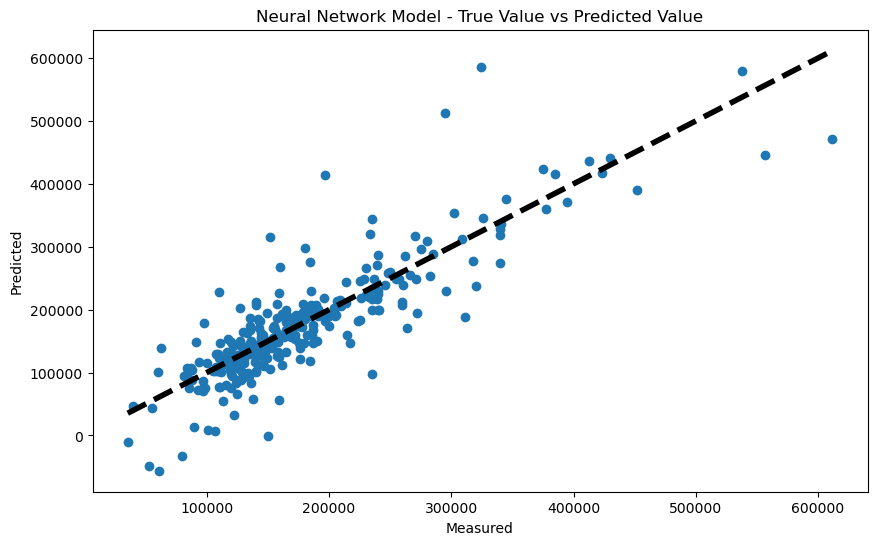

In [38]:

# Plotting the true vs predicted values for visual analysis
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_nn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Model - True Value vs Predicted Value')
plt.show()
        

Train RMSE: 108240.58809461202, Test RMSE: 111208.5988243215
Train RMSE: 167776.49122205644, Test RMSE: 169158.34503768288
Train RMSE: 109084.68814523038, Test RMSE: 112389.77140953476
Train RMSE: 171342.70467364285, Test RMSE: 172295.50257389128
Train RMSE: 108641.69433763217, Test RMSE: 111893.98698747359
Train RMSE: 170482.74585706272, Test RMSE: 171492.7013372083
Train RMSE: 107715.00360501138, Test RMSE: 111498.03310525605
Train RMSE: 164809.87774521537, Test RMSE: 166199.98873529688
Train RMSE: 107984.83286841803, Test RMSE: 111621.59684053011
Train RMSE: 176935.89134024366, Test RMSE: 177184.07055422172
Train RMSE: 107708.9891411054, Test RMSE: 110973.32617100808
Train RMSE: 161555.6362322928, Test RMSE: 163565.69383899088
Train RMSE: 107756.23359418618, Test RMSE: 111779.95516217934
Train RMSE: 176091.8875858256, Test RMSE: 176517.0871979361
Train RMSE: 106825.46079342143, Test RMSE: 110854.23789268227
Train RMSE: 170436.5366888782, Test RMSE: 171149.39495799714
Train RMSE: 107

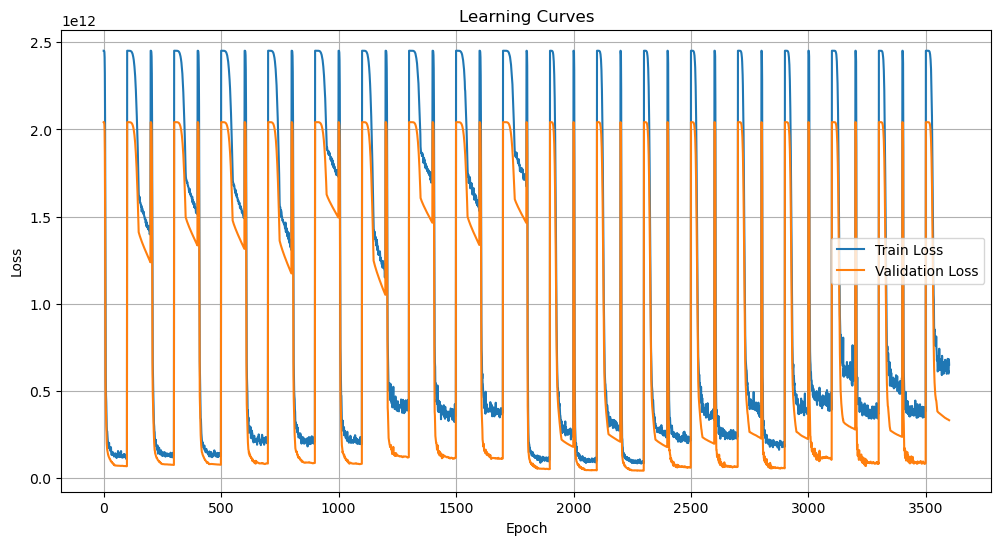

Best RMSE: 109144.03174870912
Best Parameters: {'hidden_layers': [300, 200, 100, 50, 25], 'dropout_rate': 0.6, 'l2_penalty': 0.0001, 'lr': 0.001}


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and preprocess the data
X_train = pd.read_csv('./data/X_train.csv').values
y_train = pd.read_csv('./data/y_train.csv').values.squeeze()
X_test = pd.read_csv('./data/X_test.csv').values
y_test = pd.read_csv('./data/y_test.csv').values.squeeze()

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, input_size, hidden_sizes, dropout_rate):
        super(Net, self).__init__()
        self.model = nn.Sequential()
        for i, hidden_size in enumerate(hidden_sizes):
            self.model.add_module('Linear_%d' % i, nn.Linear(input_size if i == 0 else hidden_sizes[i - 1], hidden_size))
            self.model.add_module('ReLU_%d' % i, nn.ReLU())
            self.model.add_module('Dropout_%d' % i, nn.Dropout(dropout_rate))
        self.model.add_module('Output_Linear', nn.Linear(hidden_sizes[-1], 1))

    def forward(self, x):
        return self.model(x)

# Function to calculate the RMSE
def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

# Function to perform a training epoch
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for inputs, targets in data_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

# Function to perform a validation epoch
def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    return total_loss / len(data_loader)

# Grid search over hyperparameters
hidden_layer_options = [[200, 100, 50, 25], [300, 200, 100, 50, 25]]
dropout_rates = [0.2, 0.4, 0.6]
l2_penalties = [1e-5, 1e-4, 1e-3]
learning_rates = [0.001, 0.0001]
best_rmse = np.inf
best_params = {}

# Prepare DataLoader for validation
X_train_part, X_val, y_train_part, y_val = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.1, random_state=42
)

train_loader = DataLoader(TensorDataset(X_train_part, y_train_part), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=64)

# Lists to store results
train_losses = []
val_losses = []

for hidden_layers in hidden_layer_options:
    for dropout_rate in dropout_rates:
        for l2_penalty in l2_penalties:
            for lr in learning_rates:
                # Initialize the model
                model = Net(X_train_tensor.shape[1], hidden_layers, dropout_rate).to(device)
                criterion = nn.MSELoss(reduction='sum')
                optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2_penalty)
                
                early_stopping = EarlyStopping(patience=100, min_delta=1000)  # Increase patience for early stopping

                # Training loop with learning rate scheduler
                num_epochs = 100
                scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)
                for epoch in range(num_epochs):
                    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
                    val_loss = validate_epoch(model, val_loader, criterion, device)
                    
                    # Store losses
                    train_losses.append(train_loss)
                    val_losses.append(val_loss)

                    early_stopping(val_loss)
                    if early_stopping.early_stop:
                        print("Early stopping triggered.")
                        break
                    scheduler.step()  # Update learning rate

                # Evaluate the model
                model.eval()
                with torch.no_grad():
                    train_preds = model(X_train_tensor).cpu().numpy()
                    test_preds = model(X_test_tensor).cpu().numpy()

                train_error = rmse(y_train, train_preds)
                test_error = rmse(y_test, test_preds)
                print(f'Train RMSE: {train_error}, Test RMSE: {test_error}')
                
                # Save if best
                if test_error < best_rmse:
                    best_rmse = test_error
                    best_params = {
                        'hidden_layers': hidden_layers, 
                        'dropout_rate': dropout_rate, 
                        'l2_penalty': l2_penalty, 
                        'lr': lr
                    }

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curves')
plt.grid(True)
plt.show()

print(f'Best RMSE: {best_rmse}')
print(f'Best Parameters: {best_params}')


In [38]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import mean_squared_error

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Load the data
X_train = pd.read_csv('./data/X_train.csv').values
y_train = pd.read_csv('./data/y_train.csv').values.squeeze()
X_test = pd.read_csv('./data/X_test.csv').values
y_test = pd.read_csv('./data/y_test.csv').values.squeeze()

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create custom datasets
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the network
input_size = X_train.shape[1]
model = NeuralNet(input_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        for i, (features, labels) in enumerate(train_loader):
            # Forward pass
            outputs = model(features)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Function to compute RMSE
def rmse(loader, model):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for features, labels in loader:
            outputs = model(features)
            loss = criterion(outputs, labels).item()
            total_loss += loss * features.size(0)
    return np.sqrt(total_loss / len(loader.dataset))

# Train the model
train(model, train_loader, criterion, optimizer, epochs=100)

# Evaluate the model
train_rmse = rmse(train_loader, model)
test_rmse = rmse(test_loader, model)
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')



Epoch [10/100], Loss: 34245754880.0000
Epoch [20/100], Loss: 4009016064.0000
Epoch [30/100], Loss: 4087942656.0000
Epoch [40/100], Loss: 2748969728.0000
Epoch [50/100], Loss: 671362176.0000
Epoch [60/100], Loss: 2369878272.0000
Epoch [70/100], Loss: 752764480.0000
Epoch [80/100], Loss: 1045975552.0000
Epoch [90/100], Loss: 456929504.0000
Epoch [100/100], Loss: 761928640.0000
Train RMSE: 30268.904349522596
Test RMSE: 44004.45185946593
